Found 5513 files belonging to 5 classes.


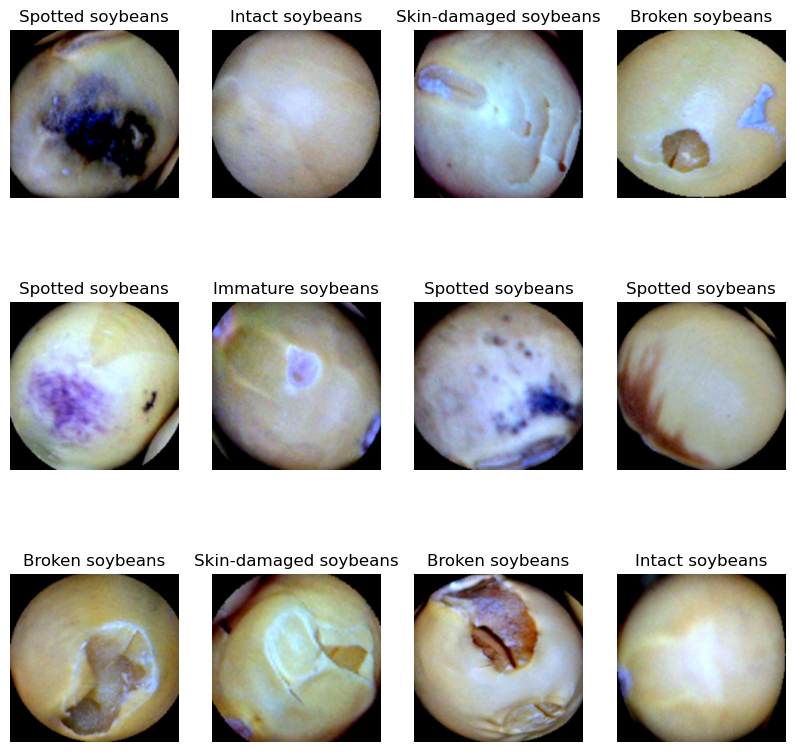

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 39s 0us/step


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential (Sequential)              │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_1 (Sequential)            │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ resnet50 (Functional)                │ (None, 8, 8, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,850,629 (90.98 MB)

 Trainable params: 262,917 (1.00 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

Epoch 1/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 292s 2s/step - accuracy: 0.2091 - loss: 1.6721 - val_accuracy: 0.2555 - val_loss: 1.6082
Epoch 2/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 278s 2s/step - accuracy: 0.2140 - loss: 1.6090 - val_accuracy: 0.2555 - val_loss: 1.6066
Epoch 3/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 282s 2s/step - accuracy: 0.2110 - loss: 1.6079 - val_accuracy: 0.2555 - val_loss: 1.6059
Epoch 4/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 280s 2s/step - accuracy: 0.2105 - loss: 1.6087 - val_accuracy: 0.2555 - val_loss: 1.6050
Epoch 5/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 270s 2s/step - accuracy: 0.2105 - loss: 1.6089 - val_accuracy: 0.2555 - val_loss: 1.6047
Epoch 6/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 268s 2s/step - accuracy: 0.2187 - loss: 1.6082 - val_accuracy: 0.2555 - val_loss: 1.6045
Epoch 7/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 408s 3s/step - accuracy: 0.2264 - loss: 1.6069 - val_accuracy: 0.2555 - val_loss: 1.6043
Epoch 8/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 568s 4s/step - accuracy: 0.2204 - loss: 1.6078 - val_accu

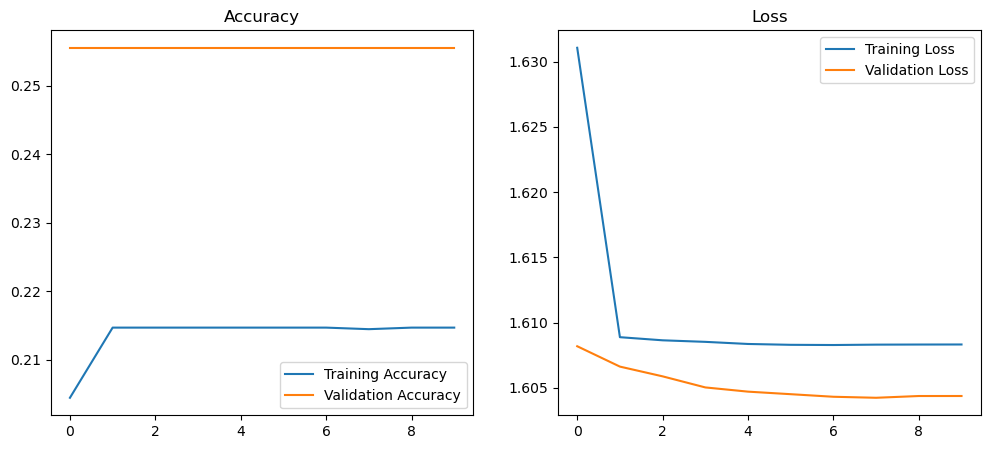

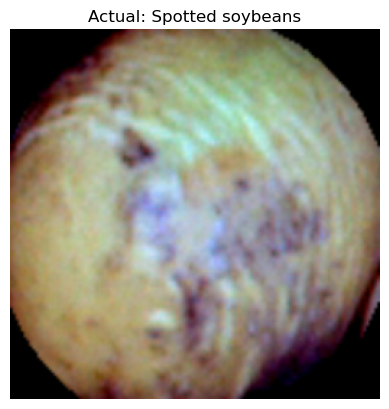

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Predicted: Intact soybeans

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


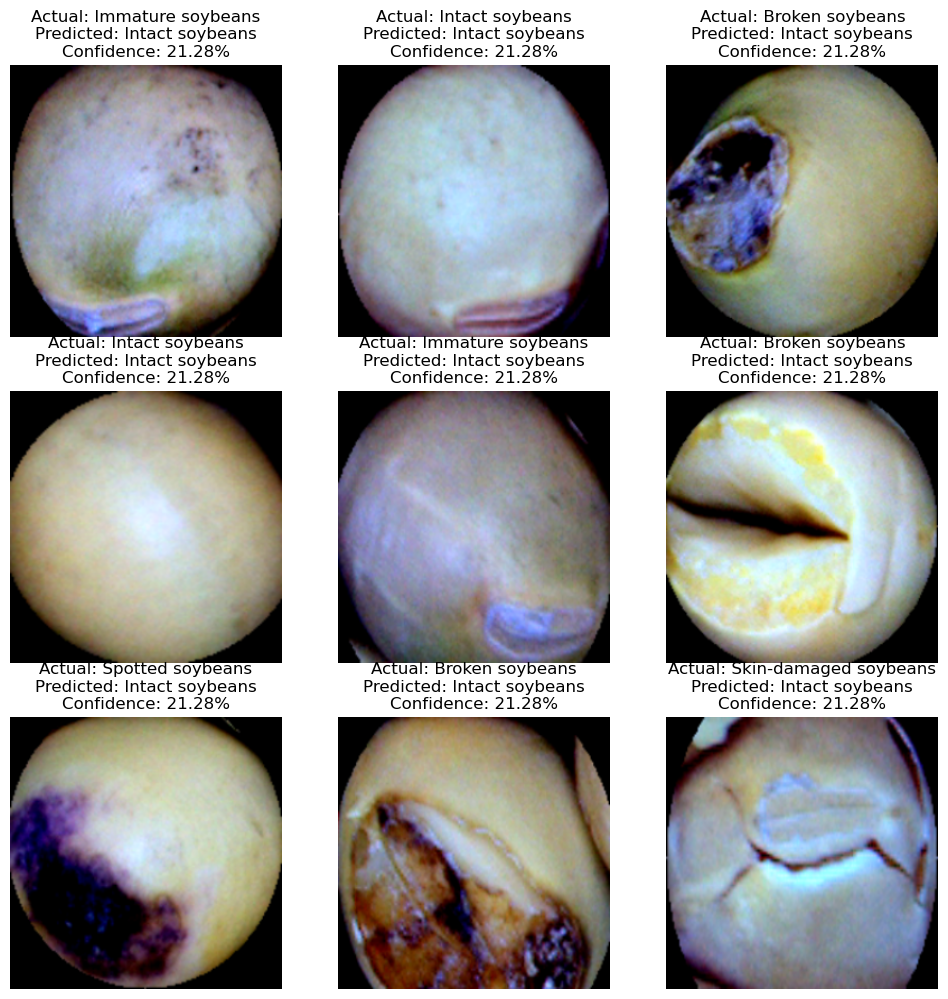

✅ Model saved to: ../models/2.keras


In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import ResNet50
import matplotlib.pyplot as plt
import numpy as np
import os

# ---------------------------
# Configuration
# ---------------------------
IMAGE_SIZE = 256
BATCH_SIZE = 32
EPOCHS = 10
DATASET_DIR = "soya seeds"  # Update this if needed
use_resnet = True  # Set to False to use the custom CNN

# ---------------------------
# Load Dataset
# ---------------------------
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    DATASET_DIR,
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE
)
class_names = dataset.class_names
NUM_CLASSES = len(class_names)

# Visualize Samples
plt.figure(figsize=(10, 10))
for images, labels in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")
plt.show()

# ---------------------------
# Dataset Splits
# ---------------------------
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    ds_size = len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    return train_ds, val_ds, test_ds

train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

# Prefetching for performance
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

# ---------------------------
# Preprocessing Layers
# ---------------------------
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.Rescaling(1.0 / 255)
])

data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
])

# ---------------------------
# Model Definitions
# ---------------------------
def build_custom_cnn():
    model = models.Sequential([
        layers.Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3)),
        resize_and_rescale,
        data_augmentation,
        layers.Conv2D(32, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(NUM_CLASSES, activation='softmax')
    ])
    return model

def build_resnet_model():
    base_model = ResNet50(
        weights='imagenet',
        include_top=False,
        input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3)
    )
    base_model.trainable = False

    inputs = layers.Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))
    x = resize_and_rescale(inputs)
    x = data_augmentation(x)
    x = base_model(x, training=False)
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(NUM_CLASSES, activation='softmax')(x)
    model = models.Model(inputs, outputs)
    return model

# ---------------------------
# Choose and Compile Model
# ---------------------------
model = build_resnet_model() if use_resnet else build_custom_cnn()
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)
model.summary()

# ---------------------------
# Train the Model
# ---------------------------
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS
)

# ---------------------------
# Plot Training Results
# ---------------------------
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Loss')
plt.show()

# ---------------------------
# Single Image Prediction
# ---------------------------
for images_batch, labels_batch in test_ds.take(1):
    image = images_batch[0].numpy().astype('uint8')
    label = labels_batch[0].numpy()
    plt.imshow(image)
    plt.title(f"Actual: {class_names[label]}")
    plt.axis("off")
    plt.show()

    prediction = model.predict(tf.expand_dims(images_batch[0] / 255.0, 0))
    print(f"Predicted: {class_names[np.argmax(prediction[0])]}\n")

# ---------------------------
# Multiple Predictions with Visualization
# ---------------------------
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0) / 255.0
    predictions = model.predict(img_array)
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

plt.figure(figsize=(12, 12))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]
        plt.title(f"Actual: {actual_class}\nPredicted: {predicted_class}\nConfidence: {confidence}%")
        plt.axis("off")
plt.show()

# ---------------------------
# Save the Model
# ---------------------------
model_dir = "../models/"
os.makedirs(model_dir, exist_ok=True)
model_files = [f for f in os.listdir(model_dir) if f.split('.')[0].isdigit()]
model_versions = [int(f.split('.')[0]) for f in model_files]
model_version = max(model_versions or [0]) + 1
model_path = os.path.join(model_dir, f"{model_version}.keras")
model.save(model_path)
print(f"✅ Model saved to: {model_path}")